# **Exploratory Data Analysis**

# **Dataset Location** :https://www.kaggle.com/datasets/sukhmandeepsinghbrar/car-price-prediction-dataset

# **About** **Dataset**

This dataset contains various features related to cars, including the year of manufacture, selling price, kilometers driven, fuel type, seller type, transmission type, number of previous owners, mileage, and engine specifications. These attributes provide valuable insights into the factors influencing car prices and can be used to develop predictive models for estimating the selling price of cars.



# **Columns Explanation**


name: The name or model of the car.


year: The manufacturing year of the car.


selling_price: The price at which the car is being sold (in the currency unit applicable to the dataset).


km_driven: The total kilometers the car has been driven.


fuel: The type of fuel the car uses (e.g., Petrol, Diesel).

seller_type: The type of seller (e.g., Individual, Dealer).


transmission: The type of transmission (e.g., Manual, Automatic).

owner: The ownership history of the car (e.g., First Owner, Second Owner).

mileage(km/ltr/kg): The mileage of the car in kilometers per liter or kilogram (for CNG/LPG vehicles).


engine: The engine capacity in cubic centimeters (cc).


max_power:The maximum power output of the car (likely in horsepower or bhp).


seats: The number of seats in the car.







# **Problem Statement:**

This project aims to perform Exploratory Data Analysis (EDA) on a dataset containing car-related features to uncover insights, identify key factors influencing car prices, and detect patterns that can aid in building a predictive model. The analysis will involve data cleaning, feature exploration, visualization, and statistical insights to understand price variations and trends in the used car market.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1-Understad The Data**

##**Data**

In [42]:
df=pd.read_csv("/content/cardekho.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


##**Shape**

In [43]:
df.shape

(8128, 12)

##**columns**

In [44]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

##**info**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


##**data types**

In [46]:
print(df.dtypes)

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object


# **2-Data Cleaning**

##handling duplicates and missing values

In [47]:
# checking duplicate rows
df.duplicated().sum()

np.int64(1202)

In [48]:
# removing duplicate rows
df.drop_duplicates(inplace=True)

In [49]:
# check the number of mising (null) values in each column
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),208
engine,208


In [50]:
df.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage(km/ltr/kg),float64
engine,float64


In [51]:
df[["mileage(km/ltr/kg)","engine","seats"]]=df[["mileage(km/ltr/kg)","engine","seats"]].fillna(df[["mileage(km/ltr/kg)","engine","seats"]].mean())

In [52]:
df["max_power"].fillna(df["max_power"].mode()[0],inplace=True)

<ipython-input-52-528450e25b24>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["max_power"].fillna(df["max_power"].mode()[0],inplace=True)


In [53]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),0
engine,0


In [54]:
# Loop through each column in the DataFrame
for x in df.columns:
    # Print the column name
    print("Value counts for ", x)

    # Print the counts of each unique value in the column
    print(df[x].value_counts())

    # Print a separator line for clarity
    print("_" * 40)

Value counts for  name
name
Maruti Swift Dzire VDI                          118
Maruti Alto 800 LXI                              76
Maruti Alto LXi                                  69
Maruti Swift VDI                                 60
Maruti Swift VDI BSIV                            56
                                               ... 
Ford EcoSport 1.5 TDCi Titanium Plus BE BSIV      1
Ford Figo 1.5 Sports Edition MT                   1
Volkswagen Polo Select 1.2 MPI Highline           1
Honda Jazz V Diesel                               1
Renault Duster RXZ 110PS AMT BSIV                 1
Name: count, Length: 2058, dtype: int64
________________________________________
Value counts for  year
year
2017    808
2016    693
2015    681
2018    608
2012    604
2014    581
2013    562
2011    554
2010    380
2019    347
2009    240
2008    205
2007    176
2006    123
2005     91
2020     63
2004     60
2003     47
2002     26
2000     20
1999     17
1997     11
1998     10
2001      9
199

# 3-**Descriptive Statistics**

In [55]:
# summary  statistics of numarical columns
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,6926.000000,6.926000e+03,6.926000e+03,6926.000000,6926.000000,6926.000000
mean,2013.420300,5.172707e+05,7.399568e+04,19.465310,1430.891337,5.434653
std,4.078286,5.197670e+05,5.835810e+04,3.987876,486.025467,0.969336
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,16.950000,1197.000000,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,19.465310,1248.000000,5.000000
75%,2017.000000,6.335000e+05,1.000000e+05,22.320000,1498.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


#4-**Data Visualization**

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage(km/ltr/kg),float64
engine,float64


In [58]:
for column in df.columns:
  print("unique for",column)
  print(df[column].nunique())
  print(" ")

unique for name
2058
 
unique for year
29
 
unique for selling_price
677
 
unique for km_driven
921
 
unique for fuel
4
 
unique for seller_type
3
 
unique for transmission
2
 
unique for owner
5
 
unique for mileage(km/ltr/kg)
382
 
unique for engine
122
 
unique for max_power
320
 
unique for seats
10
 


## **countplot**

<ipython-input-59-91b586825334>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="fuel",data=df,palette="viridis")


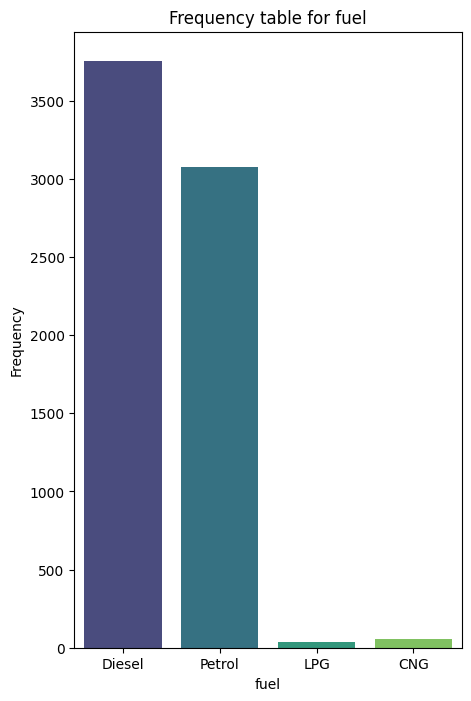

In [59]:
plt.figure(figsize=(5,8))

sns.countplot(x="fuel",data=df,palette="viridis")

plt.title("Frequency table for fuel")
plt.xlabel("fuel")
plt.ylabel("Frequency")
plt.show()

<ipython-input-60-635825af787e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="seller_type",data=df,palette="viridis")


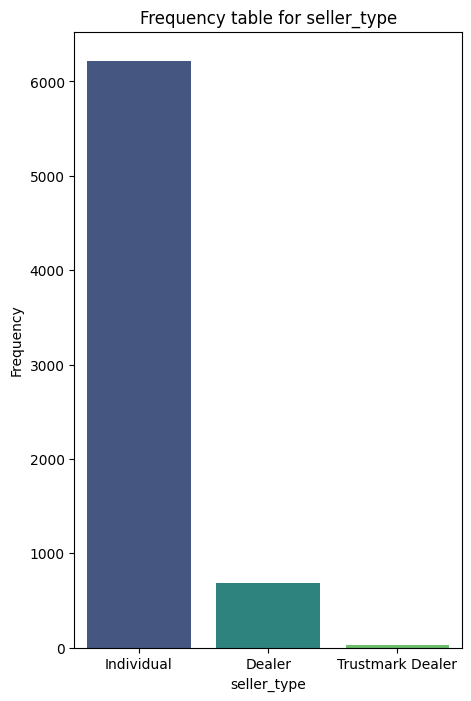

In [60]:
plt.figure(figsize=(5,8))

sns.countplot(x="seller_type",data=df,palette="viridis")

plt.title("Frequency table for seller_type")
plt.xlabel("seller_type")
plt.ylabel("Frequency")
plt.show()

<ipython-input-61-602e39108f56>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="owner",data=df,palette="viridis")


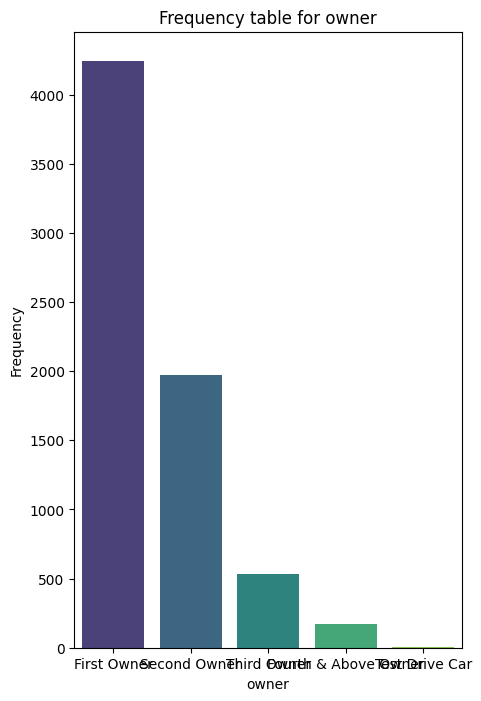

In [61]:
plt.figure(figsize=(5,8))

sns.countplot(x="owner",data=df,palette="viridis")

plt.title("Frequency table for owner")
plt.xlabel("owner")
plt.ylabel("Frequency")
plt.show()

##**Histplot**

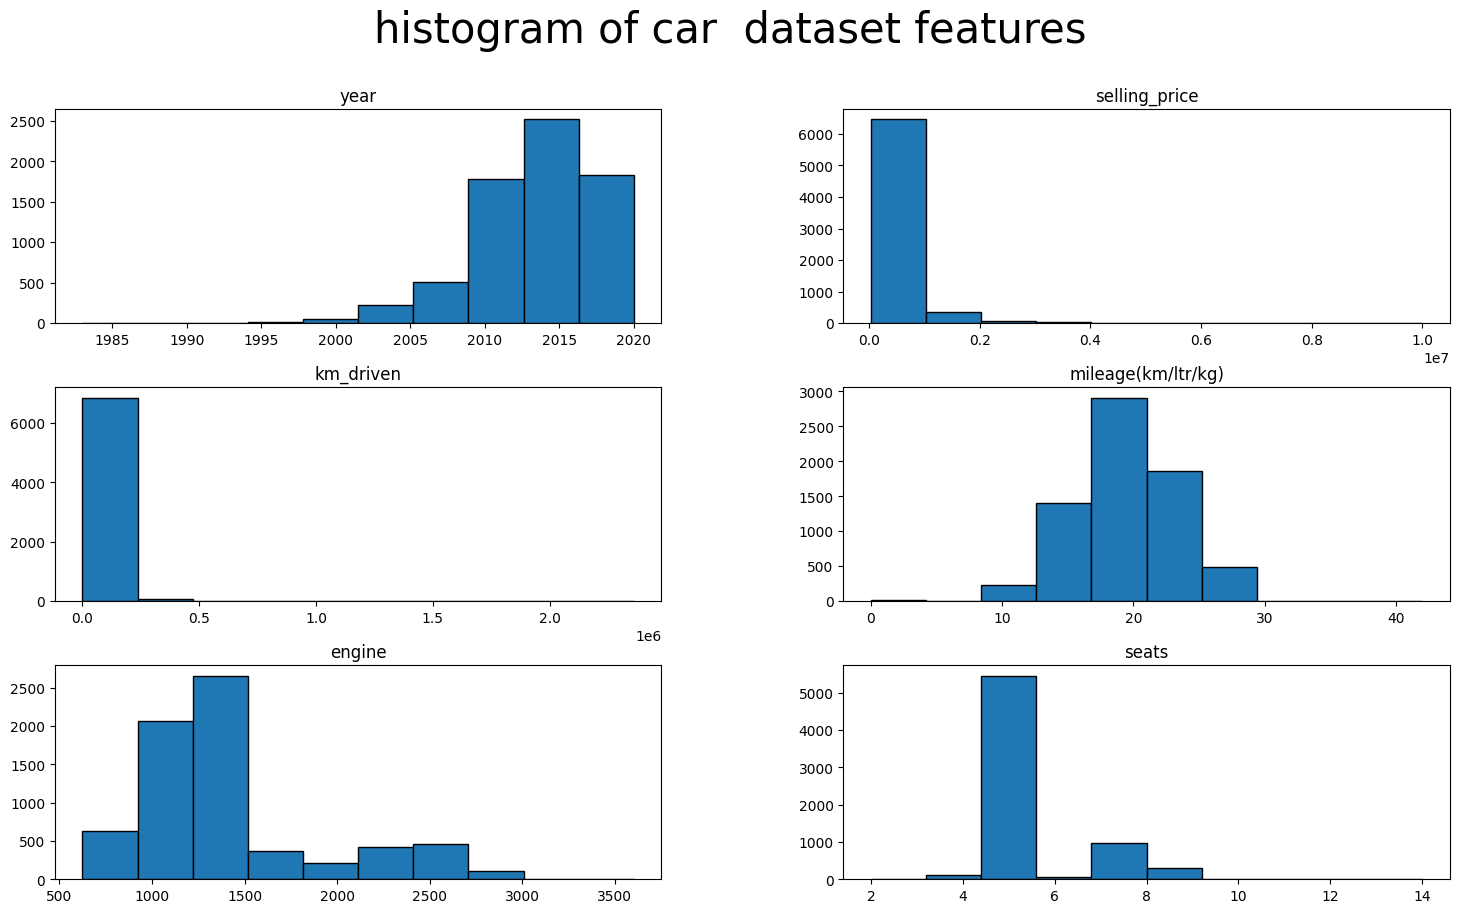

In [62]:
# ploting histogram for each feature
df.hist(edgecolor="black",figsize=(18,10),grid=False)
plt.suptitle("histogram of car  dataset features",fontsize=30)
plt.show()

# **5- Correlation Analysis**

converting qualitative variable to numeric

In [63]:
df.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage(km/ltr/kg),float64
engine,float64


In [64]:
# importing labelencoding from sklearn library from preprocessing module.
from sklearn.preprocessing import LabelEncoder

# creating a instance of label encoder
le=LabelEncoder()

In [65]:
df['name']=le.fit_transform(df['name'])
df['fuel']=le.fit_transform(df['fuel'])
df['seller_type']=le.fit_transform(df['seller_type'])
df['transmission']=le.fit_transform(df['transmission'])
df['owner']=le.fit_transform(df['owner'])
df['max_power']=le.fit_transform(df['max_power'])

df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,1307,2014,450000,145500,1,1,1,0,23.40,1248.0,244,5.0
1,1607,2014,370000,120000,1,1,1,2,21.14,1498.0,15,5.0
2,385,2006,158000,140000,3,1,1,4,17.70,1497.0,253,5.0
3,781,2010,225000,127000,1,1,1,0,23.00,1396.0,295,5.0
4,1349,2007,130000,120000,3,1,1,0,16.10,1298.0,287,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,1409,2013,260000,50000,3,1,1,2,18.90,998.0,224,5.0
8122,773,2014,475000,80000,1,1,1,2,22.54,1396.0,290,5.0
8123,771,2013,320000,110000,3,1,1,0,18.50,1197.0,267,5.0
8124,656,2007,135000,119000,1,1,1,1,16.80,1493.0,30,5.0


In [66]:
df.dtypes

,0
name,int64
year,int64
selling_price,int64
km_driven,int64
fuel,int64
seller_type,int64
transmission,int64
owner,int64
mileage(km/ltr/kg),float64
engine,float64


In [67]:
car_correlation_matrix=df.corr()
car_correlation_matrix

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
name,1.000000,-0.022545,-0.021673,0.092123,-0.118306,0.049048,0.040291,0.007577,-0.014321,0.063514,-0.137894,0.090338
year,-0.022545,1.000000,0.433076,-0.377003,-0.067323,-0.130527,-0.140995,-0.452247,0.345414,-0.017967,0.079712,0.022260
selling_price,-0.021673,0.433076,1.000000,-0.165620,-0.241328,-0.248659,-0.462683,-0.224121,-0.107479,0.439321,-0.214988,0.156849
km_driven,0.092123,-0.377003,-0.165620,1.000000,-0.271970,0.109420,0.118658,0.249455,-0.194653,0.250966,-0.119607,0.206010
fuel,-0.118306,-0.067323,-0.241328,-0.271970,1.000000,0.037424,-0.028296,-0.015096,-0.096639,-0.505662,0.141175,-0.342678
seller_type,0.049048,-0.130527,-0.248659,0.109420,0.037424,1.000000,0.181768,0.145390,-0.007201,-0.071159,0.032652,0.028159
transmission,0.040291,-0.140995,-0.462683,0.118658,-0.028296,0.181768,1.000000,0.079247,0.172050,-0.217707,0.183864,0.019259
owner,0.007577,-0.452247,-0.224121,0.249455,-0.015096,0.145390,0.079247,1.000000,-0.167498,0.035054,-0.064241,0.005893
mileage(km/ltr/kg),-0.014321,0.345414,-0.107479,-0.194653,-0.096639,-0.007201,0.172050,-0.167498,1.000000,-0.578483,0.460821,-0.459624
engine,0.063514,-0.017967,0.439321,0.250966,-0.505662,-0.071159,-0.217707,0.035054,-0.578483,1.000000,-0.443607,0.657798


## **Correlation heatmap**

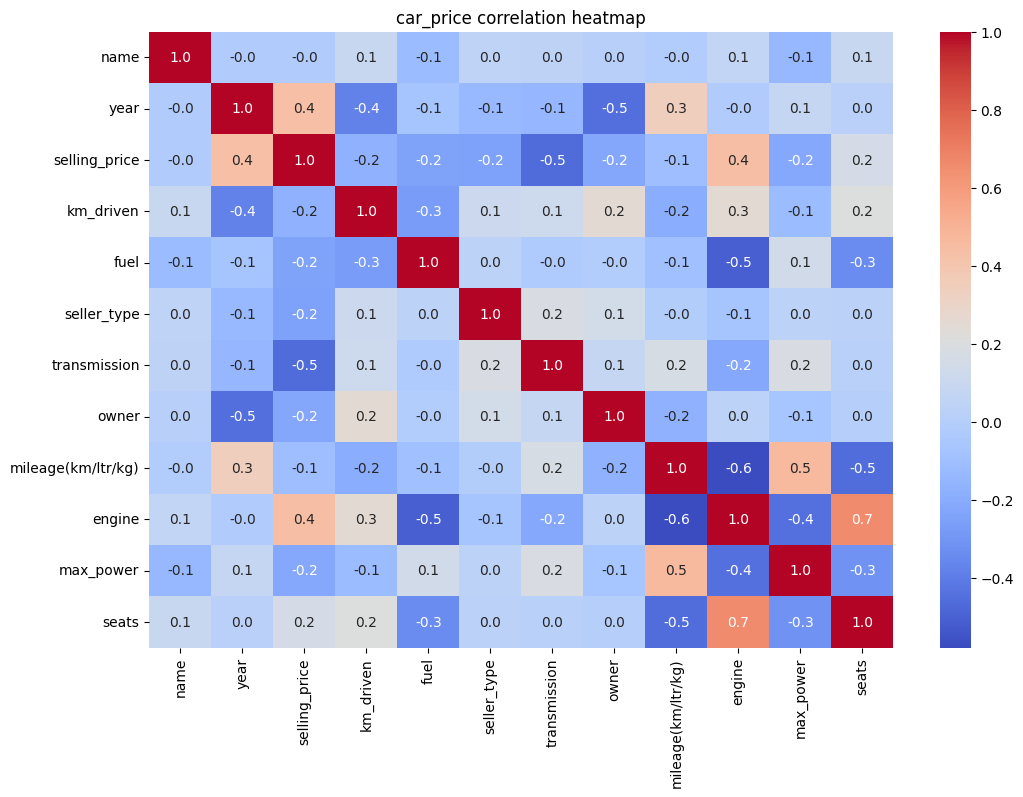

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(car_correlation_matrix,annot=True,fmt='0.01f',cmap="coolwarm")
plt.title("car_price correlation heatmap")
plt.show()

In [69]:
# removing features based on correlattion
df.drop(columns={"max_power","mileage(km/ltr/kg)","seller_type","fuel","km_driven","name"},inplace=True)

In [70]:
df

,year,selling_price,transmission,owner,engine,seats
0,2014,450000,1,0,1248.0,5.0
1,2014,370000,1,2,1498.0,5.0
2,2006,158000,1,4,1497.0,5.0
3,2010,225000,1,0,1396.0,5.0
4,2007,130000,1,0,1298.0,5.0
...,...,...,...,...,...,...
8121,2013,260000,1,2,998.0,5.0
8122,2014,475000,1,2,1396.0,5.0
8123,2013,320000,1,0,1197.0,5.0
8124,2007,135000,1,1,1493.0,5.0


## **Removeing Skewness**

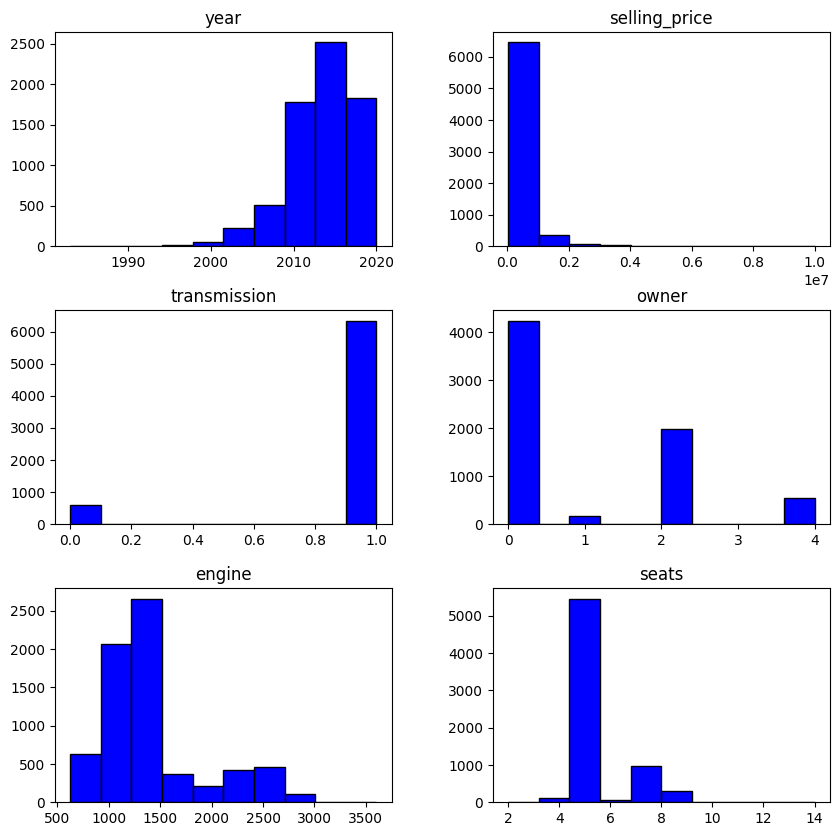

In [71]:
df.hist(color="blue",edgecolor="black",grid=False,figsize=(10,10))
plt.show()

In [72]:
# checking the skewness of each column
df.skew()

,0
year,-1.010924
selling_price,5.572742
transmission,-2.992583
owner,1.107424
engine,1.234297
seats,1.947473


In [73]:
# reducing the skewness of each column using np.log1p
import numpy as np
df['year'] = np.log1p(df['year'])
df["seats"]=np.log1p(df["seats"])
df['transmission'] = np.log1p(df['transmission'])
df['owner'] = np.log1p(df['owner'])
df['engine'] = np.log1p(df['engine'])

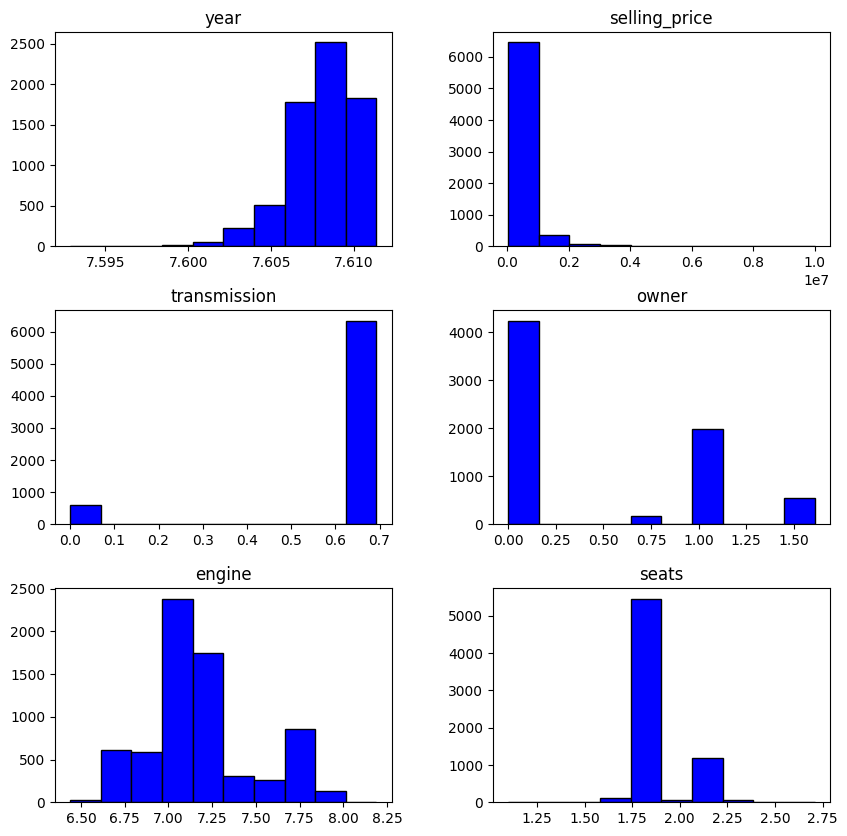

In [74]:
df.hist(color="blue",edgecolor="black",grid=False,figsize=(10,10))
plt.show()

# **6- Outlier Detection**

<Figure size 1200x1200 with 0 Axes>

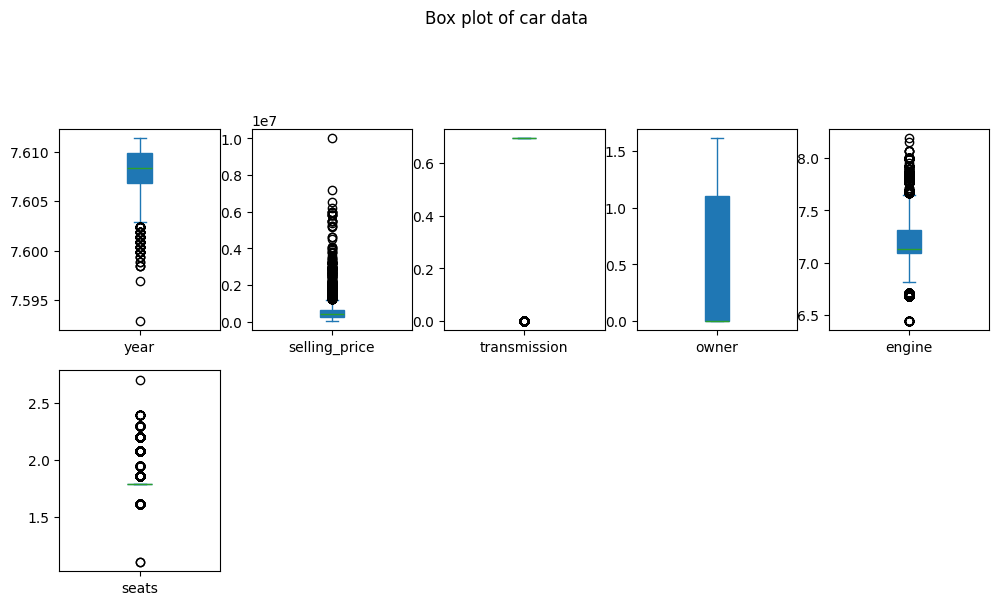

In [75]:
plt.figure(figsize=(12,12))
df.plot(kind="box",layout=(4,5),figsize=(12,12),subplots=True,vert=True,patch_artist=True)
plt.suptitle("Box plot of car data ")
plt.show()

## **removing outliers**

In [76]:
import numpy as np
import pandas as pd

# Calculate Q1 and Q3
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df = df[(df['year'] >= (Q1 - 1.5 * IQR)) & (df['year'] <= (Q3 + 1.5 * IQR))]


# Optionally, reset the index
df.reset_index(drop=True, inplace=True)

In [77]:
import numpy as np
import pandas as pd

# Calculate Q1 and Q3
Q1 = df['engine'].quantile(0.25)
Q3 = df['engine'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df = df[(df['engine'] >= (Q1 - 1.5 * IQR)) & (df['engine'] <= (Q3 + 1.5 * IQR))]


# Optionally, reset the index
df.reset_index(drop=True, inplace=True)

In [78]:
import numpy as np
import pandas as pd

# Calculate Q1 and Q3
Q1 = df['seats'].quantile(0.25)
Q3 = df['seats'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df = df[(df['seats'] >= (Q1 - 1.5 * IQR)) & (df['seats'] <= (Q3 + 1.5 * IQR))]


# Optionally, reset the index
df.reset_index(drop=True, inplace=True)

<Figure size 1200x1200 with 0 Axes>

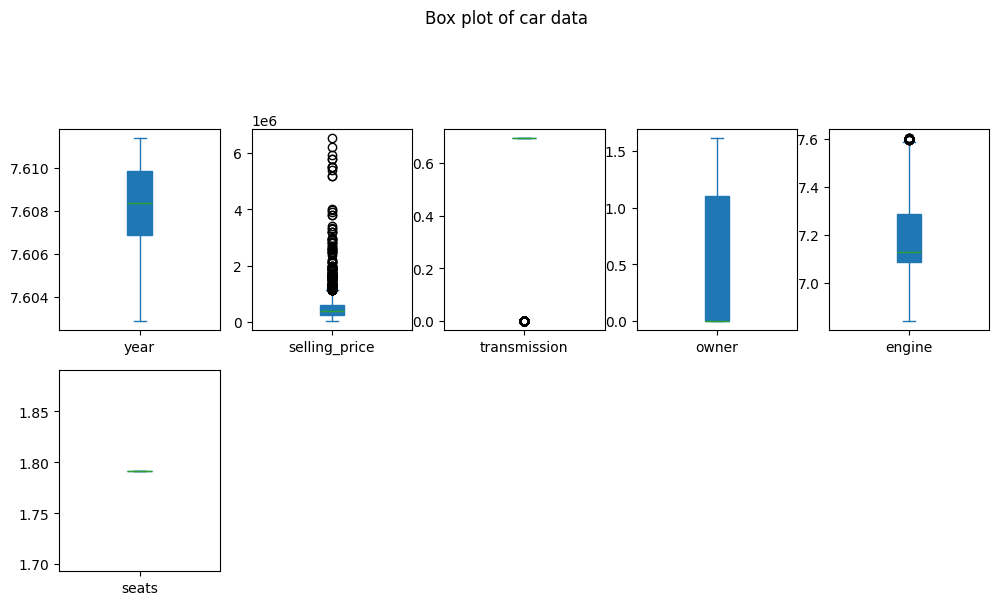

In [79]:
plt.figure(figsize=(12,12))
df.plot(kind="box",layout=(4,5),figsize=(12,12),subplots=True,vert=True,patch_artist=True)
plt.suptitle("Box plot of car data ")
plt.show()

# **8- Data Scaling**

In [81]:
from sklearn.preprocessing import StandardScaler
# # Standardization (mean = 0, std = 1)
scaler = StandardScaler()
df[['year','transmission','owner','engine','seats','selling_price']] = scaler.fit_transform(df[['year','transmission','owner','engine','seats','selling_price']])


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4637 entries, 0 to 4636
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           4637 non-null   float64
 1   selling_price  4637 non-null   float64
 2   transmission   4637 non-null   float64
 3   owner          4637 non-null   float64
 4   engine         4637 non-null   float64
 5   seats          4637 non-null   float64
dtypes: float64(6)
memory usage: 217.5 KB


# **9- Initial Modeling and Hypothesis Testing**

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Define features and target variable
X = df[['year','transmission','owner','engine','seats']]
y = df['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a baseline logistic regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_pred,y_test)
print('mean squared error:=',mse)
print('mean absolute error:=',mae)

mean squared error:= 0.8122932628881374
mean absolute error:= 0.3854677585752367


# **10- Documentation and Reporting**

In [84]:
#Summarize key findings
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with selling price ': df.corr()['selling_price'].sort_values(ascending=False)
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")
# Prepare final dataset for modeling
final_df = df[['year','transmission','owner','engine','seats','selling_price']]
print("\n",final_df)

EDA Summary:
Dataset Shape: (4637, 6)
Missing Values: 0
Correlation with selling price : selling_price    1.000000
year             0.498898
engine           0.409556
owner           -0.265679
transmission    -0.417207
seats                 NaN
Name: selling_price, dtype: float64

           year  transmission     owner    engine  seats  selling_price
0     0.023906      0.302609 -0.728794 -0.201706    0.0      -0.085678
1     0.023906      0.302609  1.157070  0.941396    0.0      -0.270622
2    -2.209670      0.302609  2.033947  0.937215    0.0      -0.760725
3    -1.091772      0.302609 -0.728794  0.499886    0.0      -0.605834
4    -1.929987      0.302609 -0.728794  0.044210    0.0      -0.825456
...        ...           ...       ...       ...    ...            ...
4632 -0.254806      0.302609  1.157070 -1.600980    0.0      -0.524921
4633  0.023906      0.302609  1.157070  0.499886    0.0      -0.027883
4634 -0.254806      0.302609 -0.728794 -0.462897    0.0      -0.386213
4635 -1

# **Car Price Prediction: Insights from Exploratory Data Analysis (EDA)**

This project aimed to analyze the factors influencing used car prices through Exploratory Data Analysis (EDA). The dataset included features such as car age, mileage, fuel type, transmission type, seller type, and ownership history. Our analysis revealed that newer cars, lower mileage, diesel engines, automatic transmission, and fewer previous owners contribute to higher resale prices. Dealer-sold cars tend to be priced higher than those sold by individuals, and the original price of the car strongly correlates with its resale value. These insights highlight key trends in the used car market and provide a foundation for developing a machine learning model to predict car prices accurately. This study can assist buyers in making informed decisions and help sellers set competitive prices based on market trends.